# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [4]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [5]:
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('./heights.csv')

Saving heights.csv to heights.csv


In [6]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


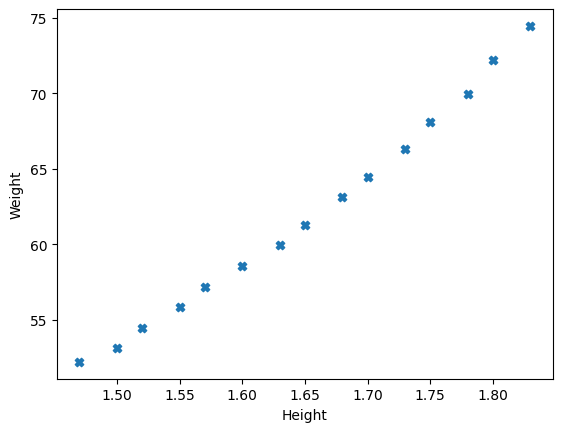

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [8]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)
from sklearn import linear_model

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [9]:
# class LinearRegression:
#     def __init__(self, lr=0.001, epochs=30):
#         """
#         Fits a linear regression model on a given dataset.

#         Args:
#             lr: learning rate
#             epochs: number of iterations over the dataset
#         """
#         self.lr = lr
#         self.epochs = epochs
#         ######################
#         #   YOUR CODE HERE   #
#         ######################
#         # You may add additional fields

#     def train(self, X, y):
#         """
#         Initialize weights. Iterate through the dataset and update weights once every epoch.

#         Args:
#             X: features
#             y: target
#         """
#         ######################
#         #   YOUR CODE HERE   #
#         ######################



#     def update_weights(self, X, y):
#         """
#         Helper function to calculate the gradients and update weights using batch gradient descent.

#         Args:
#             X: features
#             y: target
#         """
#         ######################
#         #   YOUR CODE HERE   #
#         ######################



#     def predict(self, X):
#         """
#         Predict values using the weights.

#         Args:
#             X: features

#         Returns:
#             The predicted value.
#         """
#         ######################
#         #   YOUR CODE HERE   #
#         ######################



### Build the model and train on the dataset.

In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [11]:
# def mean_squared_error(y_pred, y_actual):
#     """
#     Calculates the mean squared error between two vectors.

#     Args:
#         y_pred: predicted values
#         y_actual: actual/true values

#     Returns:
#         The mean squared error.
#     """
#     ######################
#     #   YOUR CODE HERE   #
#     ######################



### Make predictions using the model and evaluate it.

In [12]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


### Plot the predicted and the actual values.

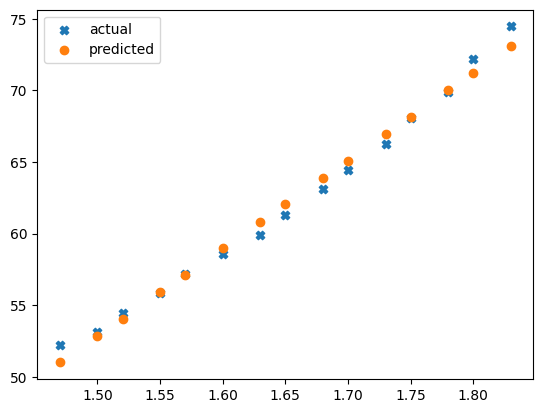

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [14]:
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('./advertise.csv')

Saving advertise.csv to advertise (2).csv


In [15]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [ ]:
# def dataset_minmax(dataset):
#     """
#     Finds the min and max values for each column.
#     """
#     minmax = list()
#     for i in range(len(dataset[0])):
#         col_values = [row[i] for row in dataset]
#         value_min = min(col_values)
#         value_max = max(col_values)
#         minmax.append([value_min, value_max])
#     return minmax

# def normalize_dataset(dataset, minmax):
#     """
#     Rescales dataset columns to the range 0-1.
#     """
#     for row in dataset:
#         for i in range(len(row)):
#             row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
#     return dataset

# def unnormalize_dataset(dataset, minmax):
#     """
#     Rescales dataset columns to their original values.
#     """
#     for row in dataset:
#         for i in range(len(row)):
#             row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
#     return dataset

In [17]:
######################
#   YOUR CODE HERE   #
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
X_n=scaler.transform(X_train)
######################



### Split the data into train and test set.

In [ ]:
# def split_indices(n, test_frac, seed):
#     """
#     Provides indices for creating training and test set.
#     """
#     # Determine the size of the test set
#     n_test = int(test_frac * n)
#     np.random.seed(seed)
#     # Create random permutation between 0 to n-1
#     idxs = np.random.permutation(n)
#     # Pick first n_test indices for test set
#     return idxs[n_test:], idxs[:n_test]

In [ ]:
# from sklearn.model_selection import train_test_split
# test_frac = 0.2 ## Set the fraction for the test set
# rand_seed = 42 ## Set the random seed

# train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
# print("#samples in training set: {}".format(len(train_indices)))
# print("#samples in test set: {}".format(len(test_indices)))

In [18]:
from sklearn.model_selection import train_test_split
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

# X_train = X[train_indices]
# y_train = y[train_indices]
# X_test = X[test_indices]
# y_test = y[test_indices]
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42,test_size=0.2,shuffle=True)

### Build the model and train on the dataset.

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [20]:
from sklearn.metrics import mean_squared_error
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

Saving heights.csv to heights (1).csv


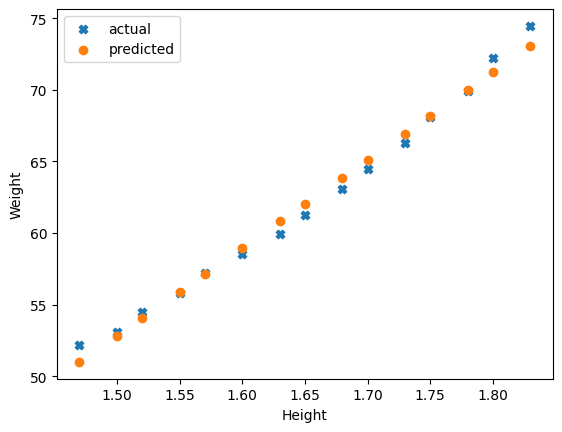

In [62]:
###########################
### Write your code here###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('./heights.csv')
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)
one = np.ones((X_train.shape[0], 1))
X = np.hstack((one, X_train))
try:
    a = np.linalg.inv(np.dot(X.T, X))
    b = np.dot(X.T, y_train)
    theta = np.dot(a, b)
except np.linalg.LinAlgError:
    print("Matrix is singular, cannot compute the inverse. Using pseudo-inverse instead.")
    a = np.linalg.pinv(np.dot(X.T, X))
    b = np.dot(X.T, y_train)
    theta = np.dot(a, b)
y_pred = np.dot(X, theta)
plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
###########################

In [69]:
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('./advertise.csv')
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

Saving advertise.csv to advertise (3).csv


In [70]:
minmax = dataset_minmax(X)
X_n = normalize_dataset(X, minmax)

#X_n = np.expand_dims(X_n, -1)
one = np.ones((X_n.shape[0], 1))
X_n = np.hstack((one, X_n))

try:
    a = np.linalg.inv(np.dot(X.T, X))
    b = np.dot(X.T, y)
    theta = np.dot(a, b)
except np.linalg.LinAlgError:
    print("Matrix is singular, cannot compute the inverse. Using pseudo-inverse instead.")
    a = np.linalg.pinv(np.dot(X.T, X))
    b = np.dot(X.T, y)
    theta = np.dot(a, b)

y_pred = np.dot(X, theta)


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [52]:
df = pd.read_csv('./heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [65]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [54]:
# class LogisticRegression:
#     def __init__(self, lr=0.001, epochs=30):
#         """
#         Fits a logistic regression model on a given dataset.

#         Args:
#             lr: learning rate
#             epochs: number of iterations over the dataset
#         """
#         self.lr = lr
#         self.epochs = epochs
#         ######################
#         #   YOUR CODE HERE   #
#         ######################
#         # You may add additional fields

#     # Function for model training
#     def train(self, X, y):
#         """
#         Initialize weights. Iterate through the dataset and update weights once every epoch.

#         Args:
#             X: features
#             y: target
#         """
#         ######################
#         #   YOUR CODE HERE   #
#         ######################



#     def update_weights(self, X, y):
#         """
#         Helper function to calculate the gradients and update weights in gradient descent.

#         Args:
#             X: features
#             y: target
#         """
#         ######################
#         #   YOUR CODE HERE   #
#         ######################



#     def predict(self, X):
#         """
#         Predict probabilities using the weights.

#         Args:
#             X: features

#         Returns:
#             The predicted probability.
#         """
#         ######################
#         #   YOUR CODE HERE   #
#         ######################



### Build the model and train on the dataset.

In [66]:
# model = LogisticRegression(0.1, 100000)
# model.train(X_train, y_train)
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [56]:
# def accuracy(y_pred, y_actual):
#     """
#     Calculates the accuracy of the predictions (binary values).

#     Args:
#         y_pred: predicted values
#         y_actual: actual/true values

#     Returns:
#         The accuracy.
#     """
#     ######################
#     #   YOUR CODE HERE   #
#     ######################



### Make predictions using the model and evaluate it.

In [67]:
from sklearn.metrics import accuracy_score
y_pred_probs = model.predict_proba(X_train)
y_pred = model.predict(X_train)
# y_pred = (y_pred_probs >= 0.5).astype('float')
# print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))
print("Train Accuracy: {}".format(accuracy_score(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

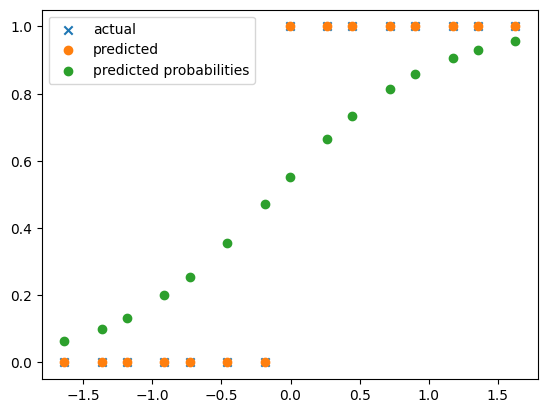

In [68]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs[:, 1], marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [59]:
#####################
#   YOUR CODE HERE   #
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        self.w = None
        self.b = None

        ######################
        # You may add additional fields

    # Function for model training

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        for _ in range(self.epochs):
           self.update_weights(X, y)






        ######################



    def update_weights(self, X, y):
        """


        Args:
            X: features
            y: target
        """
        ######################

        predictions = self.predict((np.dot(X, self.w)+self.b))
        gradient = np.dot(X.T, (predictions - y)) / self.m
        R = np.diag(predictions * (1 - predictions))
        Hessian = np.dot(X.T, np.dot(R, X)) / self.m
        self.w -= np.dot(np.linalg.inv(Hessian), gradient)

        #   YOUR CODE HERE   #
        linear_pred = np.dot(X, self.w) + self.b
        predictions = self.predict(linear_pred)
        dw = (1/self.m) * np.dot(X.T, (predictions - y))
        db = (1/self.m) * np.sum(predictions-y)
        self.w = self.w - self.lr*dw
        self.b = self.b - self.lr*db

        ######################



    def predict(self, z):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        return 1/(1+np.exp(-z))
        ######################

        ######################

######################

In [60]:
#####################
#   YOUR CODE HERE   #
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    y_pred = np.array(y_pred)
    y_actual = np.array(y_actual)
    correct_predictions = np.sum(y_pred == y_actual)
    total_predictions = len(y_actual)
    return correct_predictions / total_predictions
linear_pred = np.dot(X_train, model.w) + model.b
y_pred_probs = model.predict(linear_pred)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

    ######################


######################

Train Accuracy: 1.0


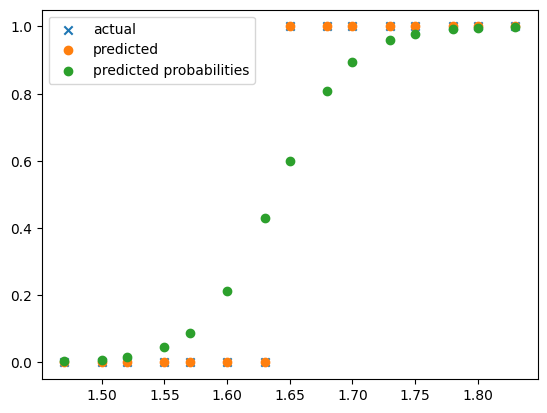

In [61]:
#####################
#   YOUR CODE HERE   #
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()



######################

# K Means Clustering(100 marks)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



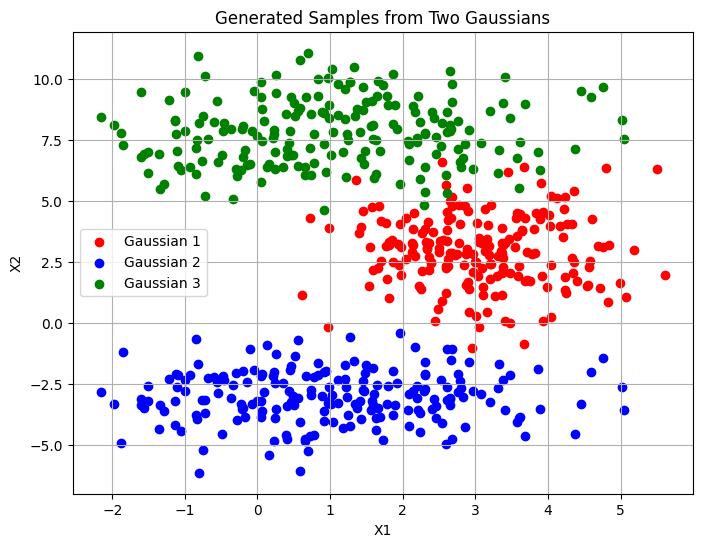

In [ ]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


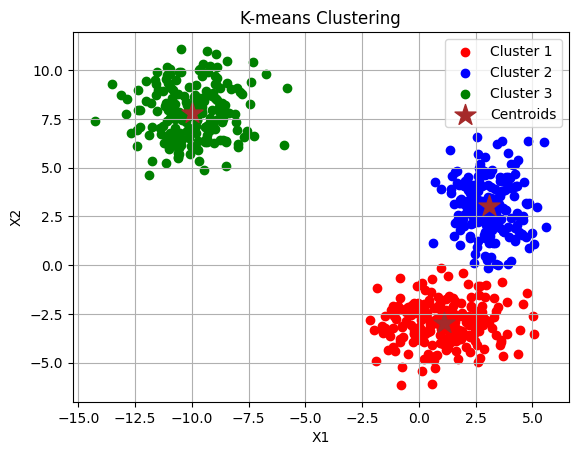

In [ ]:
#####################
#   YOUR CODE HERE   #
from sklearn.cluster import KMeans
X = np.vstack((samples1, samples2, samples3))
km=KMeans(n_clusters=3)
labels=km.fit_predict(X)
plt.scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], c='red', label='Cluster 1')
plt.scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], c='blue', label='Cluster 2')
plt.scatter(X[labels == 2][:, 0], X[labels == 2][:, 1], c='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=250, c='brown',marker='*' ,label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()


######################